# Chance of Admission Prediction Using Machine Learning

## Introduction
In recent years, higher education has become highly competitive, and students aim to secure admission to reputed universities based on their academic and profile strength. Predicting the probability of admission can help students understand where they stand and make informed decisions.

This project focuses on building a Machine Learning model that predicts the chance of admission for a student into a graduate program based on parameters such as GRE score, TOEFL score, CGPA, university rating, and research experience.

## Problem Statement
Students often face difficulty in estimating their chances of admission to universities due to multiple influencing factors. A data-driven approach is required to analyze these factors and predict admission probability.

## Objectives
- To analyze student admission data  
- To study factors affecting admission chances  
- To build a machine learning model for prediction  
- To evaluate model performance  


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
df = pd.read_csv("sample_data/Admission_Predict.csv")

# Display first 5 rows
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
# Dropping Serial No. column
df = df.drop(columns=['Serial No.'])


In [6]:
# Checking missing values
df.isnull().sum()


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
# Statistical summary
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


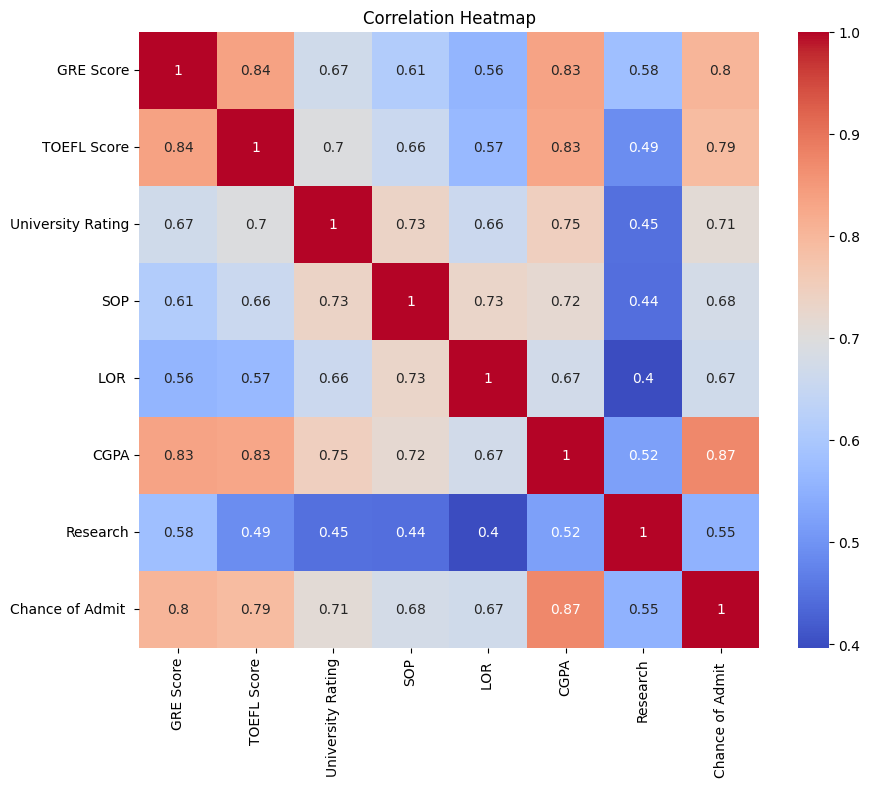

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


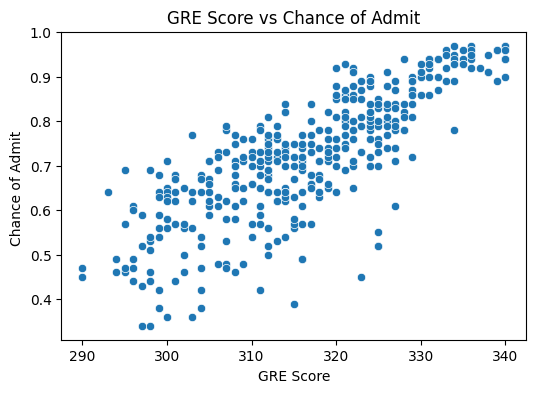

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title("GRE Score vs Chance of Admit")
plt.show()


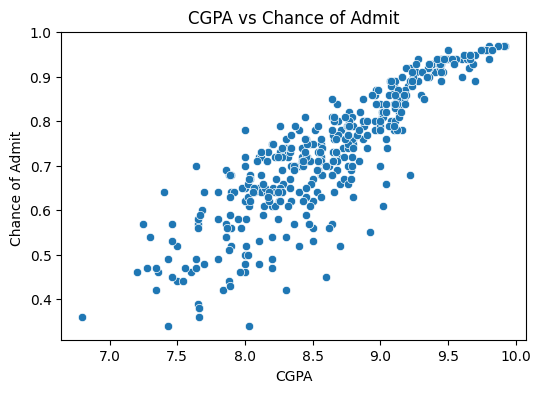

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title("CGPA vs Chance of Admit")
plt.show()


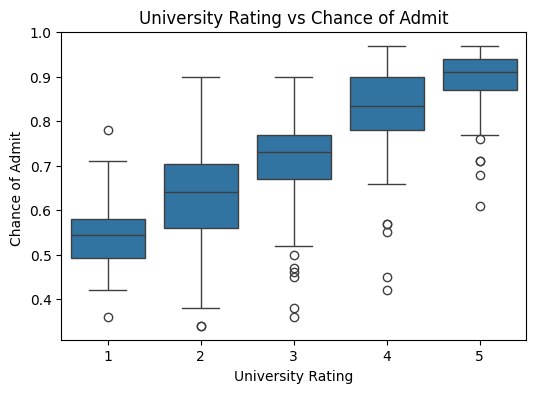

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='University Rating', y='Chance of Admit ', data=df)
plt.title("University Rating vs Chance of Admit")
plt.show()


In [12]:
# Selecting input features and target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

print(X.shape)
print(y.shape)


(400, 7)
(400,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (320, 7)
Testing data: (80, 7)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred[:5]


array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.047956733620911976
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
R2 Score: 0.8212082591486993


In [17]:
# Predicting chance of admission for a new student
new_student = [[320, 110, 4.0, 4.5, 4.5, 9.0, 1]]

prediction = model.predict(new_student)
print("Predicted Chance of Admission:", prediction[0])


Predicted Chance of Admission: 0.8187829575908598


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclusion

In this project, I analyzed various factors affecting graduate admission chances such as GRE score, TOEFL score, CGPA, university rating, SOP, and LOR. After performing data cleaning and exploratory data analysis, a Linear Regression model was trained and evaluated. The model achieved good accuracy, showing that academic performance plays a significant role in admission decisions. This project demonstrates the application of machine learning techniques to solve real-world prediction problems.